# **Read and Inspect**

This notebook loads the 5 layers into GeoDataFrames based on the chosen province/region boundary.

----

In [ ]:
# Connect Google Drive
dataset_file_dir = "D:\\Github\\case_study_flood\\DATASETS"

In [167]:
# Imports for Geo data
import geopandas as gpd
import pandas as pd
import numpy as np
import rasterio
import os
import json
import matplotlib.pyplot as plt
from rasterio.mask import mask

In [168]:
# Show the layers
os.listdir(dataset_file_dir)

['Admin', 'Flood', 'Health', 'Population', 'Roads']

These directories represent the five layers and should be loaded and inspected in this notebook.

### **Loading Layers**

----

In [176]:
import os
import geopandas as gpd

def load_layers_from_dir(directory, single_file=False, key_from_name=None):
    """
    Load shapefiles from a directory.

    Args:
        directory (str): Path to folder containing shapefiles.
        single_file (bool): If True, return only the first .shp found.
        key_from_name (callable): Optional function to extract dictionary key from filename.

    Returns:
        GeoDataFrame or dict
    """
    shp_files = [f for f in os.listdir(directory) if f.endswith(".shp")]

    if not shp_files:
        raise FileNotFoundError(f"No .shp files found in {directory}")

    if single_file:
        return gpd.read_file(os.path.join(directory, shp_files[0]))
    else:
        layers = {}
        for file in shp_files:
            if key_from_name:
                layer_name = key_from_name(file)
            else:
                layer_name = os.path.splitext(file)[0]
            layers[layer_name] = gpd.read_file(os.path.join(directory, file))
        return layers


### **Inspect Layers**

----

In [187]:
# Function to inspect each layer
def inspect_layer(layer):
  # Length of layer
  print("Length:", len(layer))
  # Corrdinate reference
  print("\nCRS:", layer.crs)
  # Bounding box
  print("\nBounds:", layer.total_bounds)
  # Show first 5 rows
  print("\nFirst 5 rows:")
  print(layer.head())
  # Show the attributes
  print("\nAttributes:", layer.columns)
  # Sample geometrics
  print("\nSample Geometries:")
  print(layer.geometry.sample())

##### **Admin Layer**

----

In [188]:
admin_dir = dataset_file_dir + "/Admin"

# Use filename as key (default)
admin_layers = load_layers_from_dir(admin_dir, single_file=False)

# Access ADM3 / ADM4
adm1 = admin_layers.get("phl_admbnda_adm1_psa_namria_20231106")
adm2 = admin_layers.get("phl_admbnda_adm2_psa_namria_20231106")
adm3 = admin_layers.get("phl_admbnda_adm3_psa_namria_20231106")
adm4 = admin_layers.get("phl_admbnda_adm4_psa_namria_20231106")


In [191]:
print(admin_layers.keys())

dict_keys(['phl_admbnda_adm0_singlepart_psa_namria_20231106', 'phl_admbnda_adm1_psa_namria_20231106', 'phl_admbnda_adm2_psa_namria_20231106', 'phl_admbnda_adm3_psa_namria_20231106', 'phl_admbnda_adm4_psa_namria_20231106', 'phl_admbndl_admALL_psa_namria_itos_20231106', 'phl_admbndp_admALL_psa_namria_itos_20231106'])


In [186]:
print("Admin (Layer 1):\n")
inspect_layer(adm1)

print("\n\nAdmin (Layer 2):\n")
inspect_layer(adm2)

print("\n\nAdmin (Layer 3):\n")
inspect_layer(adm3)

print("\n\nAdmin (Layer 4):\n")
inspect_layer(adm4)

Admin (Layer 1):

Length: 17

CRS: EPSG:4326

Bounds: [114.27789225   4.5872945  126.6049656   21.12188548]

First 5 rows:
                      ADM1_EN ADM1_PCODE            ADM0_EN ADM0_PCODE  \
0    Region I (Ilocos Region)       PH01  Philippines (the)         PH   
1  Region II (Cagayan Valley)       PH02  Philippines (the)         PH   
2  Region III (Central Luzon)       PH03  Philippines (the)         PH   
3    Region IV-A (Calabarzon)       PH04  Philippines (the)         PH   
4     Region V (Bicol Region)       PH05  Philippines (the)         PH   

        date    validOn validTo  Shape_Leng  Shape_Area      ADM1ALT1EN  \
0 2022-11-09 2023-11-06     NaT   14.995050    1.043983   Ilocos Region   
1 2022-11-09 2023-11-06     NaT   19.139048    2.241812  Cagayan Valley   
2 2022-11-09 2023-11-06     NaT   15.949563    1.793513   Central Luzon   
3 2022-11-09 2023-11-06     NaT   27.625494    1.326720      Calabarzon   
4 2022-11-09 2023-11-06     NaT   44.923243    1.446324  

##### **Flood Layer**

----

In [197]:
flood_dir = dataset_file_dir + "/Flood"

# Use filename as key (default)
flood_layer = load_layers_from_dir(flood_dir, single_file=True)

In [193]:
print(flood_layer)

   Var  AREA_KM2                                           geometry
0  1.0  62.58036  MULTIPOLYGON (((289868.78 1635581, 289858.78 1...
1  2.0  92.03140  MULTIPOLYGON (((289858.78 1635621, 289848.78 1...
2  3.0  40.89762  MULTIPOLYGON (((289168.78 1635361, 289158.78 1...
3  0.0   0.00000  MULTIPOLYGON (((288725 1590405, 288735 1590405...


##### **Health Layer**

----

In [ ]:
health_dir = dataset_file_dir + "/Health"

# Use filename as key (default)
health_layer = load_layers_from_dir(health_dir, single_file=True)

In [196]:
print(health_layer)

                       name name_en   amenity building healthcare healthca_1  \
0      Galvan Dental Clinic    None   dentist     None       None       None   
1                      None    None  pharmacy     None       None       None   
2             Farmacia Flor    None  pharmacy     None       None       None   
3           Farmacia Urduja    None  pharmacy     None       None       None   
4           Roslin Pharmacy    None  pharmacy     None       None       None   
...                     ...     ...       ...      ...        ...        ...   
11221     Farmacia Pascasio    None  pharmacy     None       None       None   
11222                  None    None  pharmacy     None       None       None   
11223           81 PHARMACY    None  pharmacy     None       None       None   
11224         Arcano Dental    None   dentist     None       None       None   
11225         Health Center    None    clinic     None       None       None   

      operator_t capacity_p addr_full a

##### **Population Layer**

----

In [ ]:
# Load population
pop_raster = rasterio.open(os.path.join(dataset_file_dir, "Population", "phl_ppp_2020.tif"))

print("CRS:", pop_raster.crs)
print("Bounds:", pop_raster.bounds)
print("Height:", pop_raster.height)
print("Width:", pop_raster.width)

CRS: EPSG:4326
Bounds: BoundingBox(left=116.927916214, bottom=4.586250183000001, right=126.605416175, top=21.070416784)
Height: 19781
Width: 11613


##### **Roads Layer**

----

In [199]:
import os
import geopandas as gpd

def load_shp_layers_with_keys(directory, key_func=None):
    layers = {}
    for file in os.listdir(directory):
        if file.endswith(".shp"):
            shp_path = os.path.join(directory, file)
            key = key_func(file) if key_func else os.path.splitext(file)[0]
            layers[key] = gpd.read_file(shp_path)
    return layers

roads_dir = dataset_file_dir + "/Roads"

# Function to extract the third word as key
def extract_third_word(filename):
    parts = filename.split("_")
    return parts[2] if len(parts) >= 3 else os.path.splitext(filename)[0]

# Load all road layers
road_layers = load_shp_layers_with_keys(roads_dir, key_func=extract_third_word)

# Check what keys we have
print(road_layers.keys())  


dict_keys(['buildings', 'natural', 'places', 'pofw', 'pois', 'railways', 'traffic', 'transport', 'water'])


In [202]:
for key, gdf in road_layers.items():
    print(f"\nInspecting layer: {key}")
    inspect_layer(gdf)  # apply your inspect_layer function
    print ("\n" + "="*40)



Inspecting layer: buildings
Length: 11695649

CRS: EPSG:4326

Bounds: [-4.06278561e+306 -5.67131843e+305  1.21208796e+308  2.23497864e+307]

First 5 rows:
    osm_id  code    fclass             name         type  \
0  4350725  1500  building             None         None   
1  4392200  1500  building             None         None   
2  4403683  1500  building  SM Mall of Asia         None   
3  4418475  1500  building      Greenbelt 3         None   
4  4468680  1500  building             None  residential   

                                            geometry  
0  POLYGON ((120.99286 14.59423, 120.993 14.59435...  
1  POLYGON ((121.09786 14.63354, 121.09815 14.633...  
2  POLYGON ((120.97975 14.53709, 120.97977 14.537...  
3  POLYGON ((121.02103 14.55166, 121.02105 14.552...  
4  POLYGON ((120.9429 14.29357, 120.94295 14.2935...  

Attributes: Index(['osm_id', 'code', 'fclass', 'name', 'type', 'geometry'], dtype='object')

Sample Geometries:
8007426    None
Name: geometry, dtype: g

### **Clip Layers**

----

In [209]:
target_crs = "EPSG:4326"  # use ADM layers CRS or reproject everything
adm4.to_crs(target_crs)
flood_gdf = flood_layer.to_crs(target_crs)
health_gdf = health_layer.to_crs(target_crs)

# Reproject all road layers
road_layers_reproj = {}
for key, gdf in road_layers.items():
    road_layers_reproj[key] = gdf.to_crs(target_crs)


In [219]:
ncr_boundary = adm1[adm1['ADM1_EN'].str.contains("National Capital Region|NCR")]


In [212]:
adm4_ncr = gpd.clip(adm4, ncr_boundary)
flood_ncr = gpd.clip(flood_gdf, ncr_boundary)
health_ncr = gpd.clip(health_gdf, ncr_boundary)

road_layers_ncr = {}
for key, gdf in road_layers_reproj.items():
    road_layers_ncr[key] = gpd.clip(gdf, ncr_boundary)

In [213]:
# Inspecting layers after clipping
def inspect_layer_clip(gdf, name):
    print(f"\nLayer: {name}")
    print(f"  Number of features: {len(gdf)}")
    print(f"  CRS: {gdf.crs}")
    print(f"  Bounds: {gdf.total_bounds}")
    print(f"  Sample attributes:\n{gdf.head()}")

# ADM4
inspect_layer_clip(adm4_ncr, "ADM4 (Barangays)")
# Flood
inspect_layer_clip(flood_ncr, "Flood Polygons")
# Health
inspect_layer_clip(health_ncr, "Health Facilities")
# Roads / Buildings
for key, gdf in road_layers_ncr.items():
    inspect_layer_clip(gdf, f"Road/Building Layer: {key}")


Layer: ADM4 (Barangays)
  Number of features: 1779
  CRS: EPSG:4326
  Bounds: [120.90639543  14.35172957 121.13503641  14.78529173]
  Sample attributes:
               ADM4_EN    ADM4_PCODE ADM4_REF             ADM3_EN ADM3_PCODE  \
9994           Salawag  PH0402106011     None  City of Dasmariñas  PH0402106   
9863         Molino IV  PH0402103047     None         Bacoor City  PH0402103   
9881   San Nicolas III  PH0402103065     None         Bacoor City  PH0402103   
35199     Talon Singko  PH1307601020     None   City of Las Piñas  PH1307601   
35196        Talon Dos  PH1307601017     None   City of Las Piñas  PH1307601   

                                   ADM2_EN ADM2_PCODE  \
9994                                Cavite    PH04021   
9863                                Cavite    PH04021   
9881                                Cavite    PH04021   
35199  Metropolitan Manila Fourth District    PH13076   
35196  Metropolitan Manila Fourth District    PH13076   

                      

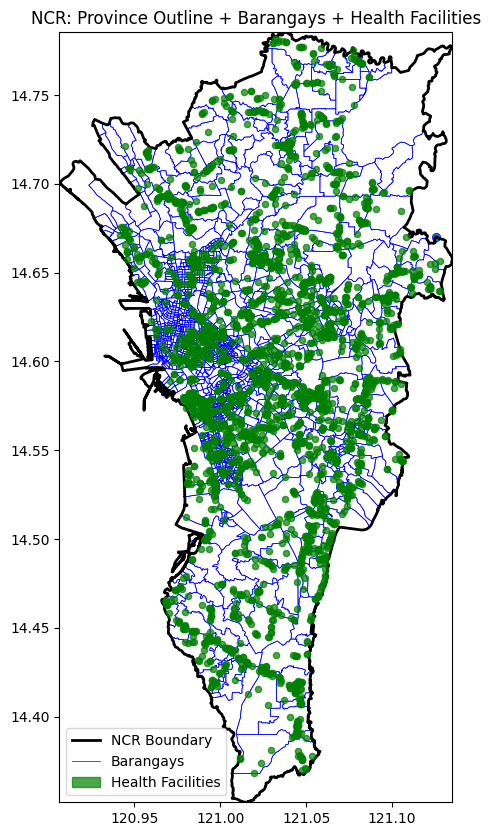

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(10, 10))

# Plot layers 
ncr_boundary.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=2, zorder=3)
adm4_ncr.plot(ax=ax, facecolor="none", edgecolor="blue", linewidth=0.5, zorder=2)
health_ncr.plot(ax=ax, color="green", markersize=20, alpha=0.7, zorder=4)

# Force axis limits to show the NCR boundary fully
xmin, ymin, xmax, ymax = ncr_boundary.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Create custom legend
legend_elements = [
    Line2D([0], [0], color='black', lw=2, label='NCR Boundary'),
    Line2D([0], [0], color='blue', lw=0.5, label='Barangays'),
    Patch(facecolor='green', edgecolor='green', alpha=0.7, label='Health Facilities')
]

ax.legend(handles=legend_elements)
plt.title("Task #1 : NCR Province Outline, boundaries and facility dots")
plt.show()

# Save plot
fig.savefig("ncr_layers_plot.png", dpi=300)